# Background

This notebook wants to show how straight forward it is to do machine learning in Jupyter notebooks. This is done by looking at the MNIST data set, which consists of images of digist, and fitting some models. It covers 'classical' models like K-Means, Naive Bayes and Logistic Regression, as well as Random Forrests as a more 'modern' model and also Deep Learning networks.

The goal is *not* to give the background on those models or fine tune them. Focus is on showing how readily those models are available and how easy it is to get started. Of course this also has the danger of using statistical models in not appropriate cases. E.g., some models below will not work for the given data.

The notebooks heavily uses code from the two great sources:
- [Python Data Science Handbook, Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/): great general introduction to Data Science with Python, include a chapter on machine learning. Free copy in form of Jupyter notebooks available.
- [Deep learning with Python, Francois Chollet](https://www.manning.com/books/deep-learning-with-python): covers deep learning via the Keras library.

# Setting up the working environment

Loading standard libraries *numpy*, *matplotlib* and *seaborn* and ignoring warnings. In addition load support functions *accuracy_score* and *confusion_matrix* from *sklearn* to measure model performance and *to_categorical* from *keras* to transform target variable. 

In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#from sklearn.datasets import load_digits
#from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Setting standard font and size for figures somewhat larger and set width of text output larger.

In [2]:
sns.set_context("talk", font_scale=1.4)
plt.rcParams['figure.figsize'] = (16,8)

np.set_printoptions(linewidth=120) # standard 75

# MNIST data set

Loading the data set and having a quick look at it.

Loading the data via supplied keras function.

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Data consists of 60.000 greyscale training images and 10.000 test images of size 28 x 28 pixels.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [6]:
test_images.shape

(10000, 28, 28)

The target variables = labels are the digits from 0 to 9.

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's plot the first 100 digits, also showing the label in green.

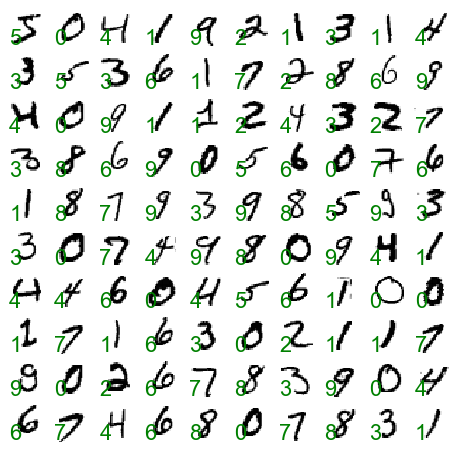

In [9]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(train_labels[i]),
            transform=ax.transAxes, color='green')

Models generally perform better if the input features are numbers between 0 and 1, not 0 and 255, thus rescale values.

In [10]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

For most of the models the input should not be a 28 x 28 matrix, but rather a 28 * 28 vector. Only models that really take the image structure into account, will use the 28 x 28 matrix as an input.

In [11]:
train_images_flat = train_images.reshape((60000, 28 * 28))
test_images_flat = test_images.reshape((10000, 28 * 28))

When working with the image, not the flattened version, the general model is set to handle color images, i.e., an additional dimension. Our images are greyscale, thus somewhat artificially add one dimension. 

In [12]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# K-Means 
Using K-Means as the first model, note that this method does the clustering without looking at the labels. We only give the maximal number of clusters (10) as parameter.

Set the training and test data.

In [13]:
X_train = train_images_flat
X_test = test_images_flat
# Do not need the labels for the model development. But we need them for evaluating the model.
y_train =  train_labels
y_test = test_labels

Load the model and fit it.

In [14]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=10, random_state=42)

model_kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Predict the labes both for the training and the test set.

In [15]:
y_train_predict = model_kmeans.predict(X_train)
y_test_predict = model_kmeans.predict(X_test)

Since K-Means does not use the labels, the numbering of the clusters is random and does not correspond to the digits.

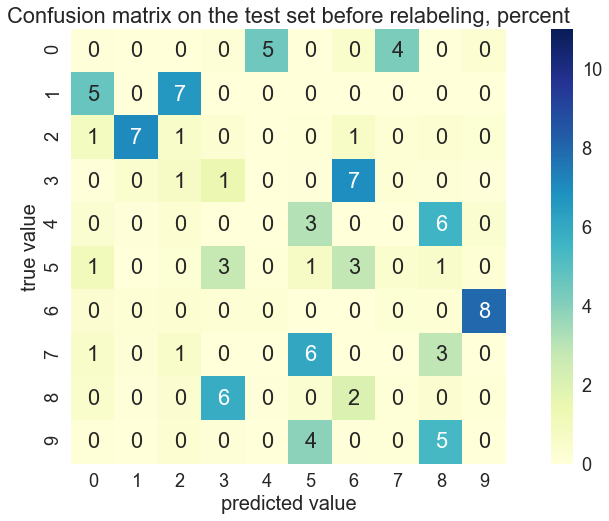

In [16]:
mat = confusion_matrix(y_test, y_test_predict)
mat = mat / mat.sum() * 100

sns.heatmap(mat, square=True, annot=True, cmap="YlGnBu", fmt='.0f', vmin=0, vmax=11)
plt.title("Confusion matrix on the test set before relabeling, percent")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

Let's relabel the predictions based on the most frequent digit in the cluster.

In [17]:
from scipy.stats import mode

y_train_predict_matched = np.zeros_like(y_train_predict)
y_test_predict_matched = np.zeros_like(y_test_predict)

for i in range(10):
    mask = (y_train_predict == i)
    y_train_predict_matched[mask] = mode(y_train[mask])[0]
    print('Original prediction {i} gets relabeled to {new}'.format(
        i=i, new=mode(y_train[mask])[0][0]))

for i in range(10):
    mask = (y_test_predict == i)
    y_test_predict_matched[mask] = mode(y_test[mask])[0]

y_train_predict = y_train_predict_matched
y_test_predict = y_test_predict_matched

Original prediction 0 gets relabeled to 1
Original prediction 1 gets relabeled to 2
Original prediction 2 gets relabeled to 1
Original prediction 3 gets relabeled to 8
Original prediction 4 gets relabeled to 0
Original prediction 5 gets relabeled to 7
Original prediction 6 gets relabeled to 3
Original prediction 7 gets relabeled to 0
Original prediction 8 gets relabeled to 4
Original prediction 9 gets relabeled to 6


Check quality of prediction.

In [18]:
print("Accuracy on training set:", accuracy_score(y_train, y_train_predict),'\n'
     "Accuracy on test set:    ", accuracy_score(y_test, y_test_predict),)

Accuracy on training set: 0.5909 
Accuracy on test set:     0.5943


We see below that the true values 4, 7 and 9 can not be separated by the model, the model predicts 4 and 7 - 9 is not predicted at all. Also 5 get's never predicted, for the true number 5, the model predicts mainly 3 and 8, but also 1, 4 and 7.

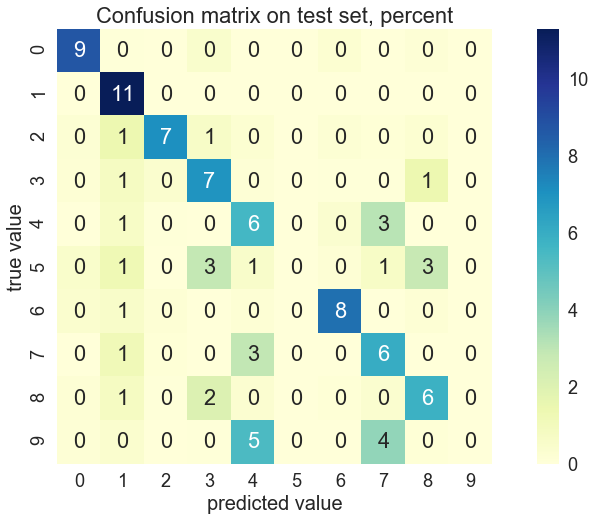

In [19]:
mat = confusion_matrix(y_test, y_test_predict)
mat = mat / mat.sum() * 100

sns.heatmap(mat, square=True, annot=True, cmap="YlGnBu", fmt='.0f')
plt.title("Confusion matrix on test set, percent")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

Some more measurement for the quality of the model. 

- Precision measures how good the model is when predicting a given value, e.g., if the model predicts 0, the true value is really 0 in 83% of the times. For the digit 5 the precision if 0, since the model never predicts 5.
- Recall measures how many of the digits the model recognises, e.g., the for 89% of the 980 images of 0 in our test sample, the model correctly predicts 0.
- f1 is the harmonic mean of precision and recall (note: Jupyter Notebooks speaks **LaTeX**):
$$ f_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

In [20]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       980
          1       0.61      0.99      0.76      1135
          2       0.88      0.69      0.77      1032
          3       0.53      0.69      0.60      1010
          4       0.36      0.57      0.44       982
          5       0.00      0.00      0.00       892
          6       0.86      0.83      0.84       958
          7       0.42      0.59      0.49      1028
          8       0.54      0.60      0.57       974
          9       0.00      0.00      0.00      1009

avg / total       0.51      0.59      0.54     10000



# Naive Bayes

Let's now try Naive Bayes as a simple model that uses the target labels. Basis for this model is Bayes' theorem:
$$ p(C_k \mid \mathbf{x} ) = \frac{p(C_k) \  p(\mathbf{x} \mid C_k)}{p(\mathbf{x})} $$

Set the training and test data.

In [21]:
X_train = train_images_flat
X_test = test_images_flat
y_train =  train_labels
y_test = test_labels

Load the model and fit it.

In [22]:
# We use Gaussian Naive Bayes, assuming that the likelihood is Gaussian, which in reallity does not hold.
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB(priors=None)

Predict the labes both for the training and the test set. Note that predicting takes much longer than fitting the model.

In [23]:
y_train_predict = model_nb.predict(X_train)
y_test_predict = model_nb.predict(X_test)

Check quality of prediction - pretty similar to K-Means.

In [24]:
print("Accuracy on training set:", accuracy_score(y_train, y_train_predict),'\n'
     "Accuracy on test set:    ", accuracy_score(y_test, y_test_predict),)

Accuracy on training set: 0.5649 
Accuracy on test set:     0.5558


This time again the 5 does not get predicted. Also the digit 2 is not really recognized very well. And especially 8 and 9 get mixed up a lot. 

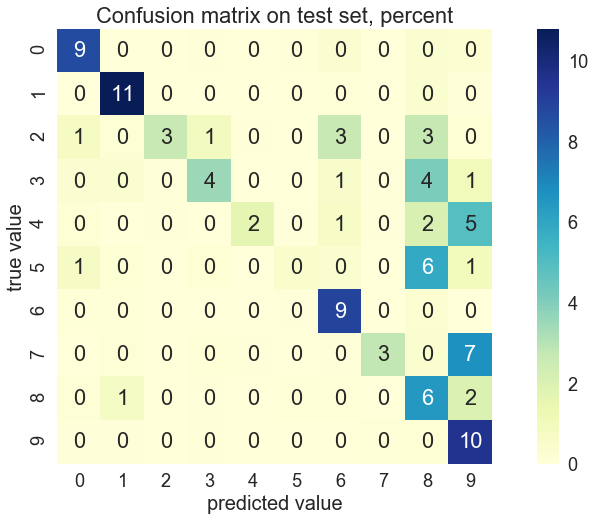

In [25]:
mat = confusion_matrix(y_test, y_test_predict)
mat = mat / mat.sum() * 100

sns.heatmap(mat, square=True, annot=True, cmap="YlGnBu", fmt='.0f')
plt.title("Confusion matrix on test set, percent")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

2 is a good example showing the difference between precision and recall. While 2 has high precision, i.e., if the model predicts 2, it is almost always correct, but it misses a lot of 2s, those recall is low. This can also be seen by the confusion matrix above.

In [26]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.79      0.89      0.84       980
          1       0.85      0.95      0.90      1135
          2       0.90      0.26      0.40      1032
          3       0.71      0.35      0.47      1010
          4       0.88      0.17      0.29       982
          5       0.55      0.05      0.09       892
          6       0.65      0.93      0.77       958
          7       0.88      0.27      0.42      1028
          8       0.28      0.67      0.40       974
          9       0.37      0.95      0.53      1009

avg / total       0.69      0.56      0.52     10000



# Logistic Regression 

Now let's use a "real" model to get some decent results ;-)

With the notion of softmax, the equivalent of the logistic function in binary logistic regression, 
$
\operatorname {softmax} (k,x_{1},\ldots ,x_{n})={\frac {e^{x_{k}}}{\sum _{i=1}^{n}e^{x_{i}}}}
$
multinominal logistic regression can be stated as
$$
\Pr(Y_{i}=c)=\operatorname {softmax} (c,{\boldsymbol {\beta }}_{1}\cdot \mathbf {X} _{i},\ldots ,{\boldsymbol {\beta }}_{K}\cdot \mathbf {X} _{i})
$$

Set the training and test data.

In [27]:
X_train = train_images_flat
X_test = test_images_flat
y_train =  train_labels
y_test = test_labels

Load the model and fit it.

In [28]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predict the labes both for the training and the test set.

In [29]:
y_train_predict = model_logistic.predict(X_train)
y_test_predict = model_logistic.predict(X_test)

Check quality of prediction, we notice some kind of overfitting, the accuracy on the training set is somewhat higher than on the test set. 

In [30]:
print("Accuracy on training set:", accuracy_score(y_train, y_train_predict),'\n'
     "Accuracy on test set:    ", accuracy_score(y_test, y_test_predict),)

Accuracy on training set: 0.9279 
Accuracy on test set:     0.9202


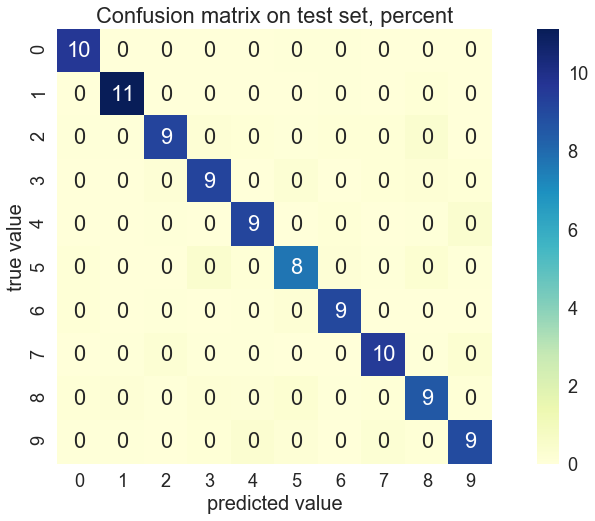

In [31]:
mat = confusion_matrix(y_test, y_test_predict)
mat = mat / mat.sum() * 100

sns.heatmap(mat, square=True, annot=True, cmap="YlGnBu", fmt='.0f')
plt.title("Confusion matrix on test set, percent")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [32]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.94      0.89      0.91      1032
          3       0.89      0.91      0.90      1010
          4       0.92      0.93      0.93       982
          5       0.89      0.86      0.88       892
          6       0.94      0.95      0.94       958
          7       0.93      0.92      0.93      1028
          8       0.87      0.88      0.87       974
          9       0.90      0.89      0.89      1009

avg / total       0.92      0.92      0.92     10000



# Random Forrest

Random Forrests are a generalisation of decision trees.

Set the training and test data.

In [33]:
X_train = train_images_flat
X_test = test_images_flat
y_train =  train_labels
y_test = test_labels

Load the model and fit it.

In [34]:
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier()
model_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Predict the labes both for the training and the test set.

In [35]:
y_train_predict = model_random.predict(X_train)
y_test_predict = model_random.predict(X_test)

Check quality of prediction. We notice significant overfitting on the training set with accuracy of 99.9%.

In [36]:
print("Accuracy on training set:", accuracy_score(y_train, y_train_predict),'\n'
     "Accuracy on test set:    ", accuracy_score(y_test, y_test_predict),)

Accuracy on training set: 0.9990333333333333 
Accuracy on test set:     0.9481


In [37]:
# Confusion matrix will show 'perfect' prediction, as above for logistic regression

# mat = confusion_matrix(y_test, y_test_predict)
# mat = mat / mat.sum() * 100
# 
# sns.heatmap(mat, square=True, annot=True, cmap="YlGnBu", fmt='.0f')
# plt.title("Confusion matrix on test set, percent")
# plt.xlabel('predicted value')
# plt.ylabel('true value')
# plt.show()

In [38]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       980
          1       0.98      0.99      0.98      1135
          2       0.93      0.96      0.95      1032
          3       0.92      0.94      0.93      1010
          4       0.94      0.95      0.95       982
          5       0.94      0.93      0.94       892
          6       0.97      0.96      0.96       958
          7       0.96      0.94      0.95      1028
          8       0.95      0.91      0.93       974
          9       0.95      0.91      0.93      1009

avg / total       0.95      0.95      0.95     10000



# Keras  - Basic

Let's create a deep learning network. While we use a different library (Keras vs. sklearn), the syntax is still quite similiar.

Set the training and test data.

In [39]:
X_train = train_images_flat
X_test = test_images_flat
y_train =  train_labels
y_test = test_labels

Load the model and fit it.

In [40]:
from keras import models
from keras import layers

In [41]:
model_dense = models.Sequential()
model_dense.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_dense.add(layers.Dense(10, activation='softmax'))

In [42]:
model_dense.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

While the labels are numbers, they numbers have no meaning in the sense of, e.g., 6 being larger than 3. The labels are categorial data, not ordinal. Keras needs the labels transformed in a categorical vector, e.g., 2 get transformed into [0,0,1,0,0,...]

In [43]:
from keras.utils import to_categorical

In [44]:
print("{label} gets transformed into {label_categorial}.".format(
    label=train_labels[0],
    label_categorial=to_categorical(train_labels[0])))

5 gets transformed into [0. 0. 0. 0. 0. 1.].


In [45]:
model_dense.fit(X_train, to_categorical(y_train),
                    epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.2549 - acc: 0.9269
Epoch 2/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.1021 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0684 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.0498 - acc: 0.984 - 7s 110us/step - loss: 0.0497 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0379 - acc: 0.9888


Predict the labes both for the training and the test set.

In [46]:
y_train_predict = model_dense.predict(X_train)
y_test_predict = model_dense.predict(X_test)

Keras gives as prediction not a single value, but the probability for each label. Thus we have to take the largest elments to get the predicted label. 

In [47]:
y_train_predict[0]

array([7.5631728e-14, 8.4616120e-11, 7.8926771e-10, 8.5261947e-04, 2.7818891e-22, 9.9914742e-01, 3.5796409e-15,
       1.0830662e-10, 5.1588022e-12, 8.6186669e-11], dtype=float32)

In [48]:
y_train_predict = np.argmax(y_train_predict, axis=1)
y_test_predict = np.argmax(y_test_predict, axis=1)

In [49]:
y_train_predict[0]

5

Check quality of prediction. We are now at 98% on the test sample, with some overfitting on the training set.

In [50]:
print("Accuracy on training set:", accuracy_score(y_train, y_train_predict),'\n'
     "Accuracy on test set:    ", accuracy_score(y_test, y_test_predict),)

Accuracy on training set: 0.99305 
Accuracy on test set:     0.9794


In [51]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.98      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.97      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.96      0.99      0.97       892
          6       0.98      0.98      0.98       958
          7       0.99      0.97      0.98      1028
          8       0.97      0.97      0.97       974
          9       0.97      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000



# Keras  - Basic + validation

With deep learning it is common to have not only a training and a test sample, but also a validation sample. Here the training and validation are used for the model development, the test sample for final testing. Let's see how this work. To really see the impact, we will also increase the number of epochs.

In [52]:
X_train = train_images_flat
X_test = test_images_flat
y_train =  train_labels
y_test = test_labels

In [53]:
# We take 10.000 data points from the 60.000 training set to form the validation set.
val_size = 10000

# We want to randomly select the observations for the validation set.
# Thus we first shuffle the training sample.
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

In [54]:
# Now we select the first 10.000 data points as validation sample and the 
# rest as training sample.
X_val = X_train[:val_size]
y_val = y_train[:val_size]

X_train = X_train[val_size:]
y_train = y_train[val_size:]

In [55]:
model_dense_val = models.Sequential()
model_dense_val.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_dense_val.add(layers.Dense(10, activation='softmax'))

In [56]:
model_dense_val.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The following takes about 2 minutes to run on my laptop, skipping it and just loading the results.

In [57]:
%%time

history = model_dense_val.fit(X_train, to_categorical(y_train),
                              epochs=25, batch_size=128,
                              validation_data=(X_val, to_categorical(y_val)))


# Save both the model and the results (accuracy, loss) when developing the model.
model_dense_val.save('dense_25_epoches_model.h5')

import pickle

with open('dense_25_epoches_history.pickle', 'wb') as file:
    pickle.dump(history.history, file)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 130us/step - loss: 0.2791 - acc: 0.9187 - val_loss: 0.1527 - val_acc: 0.9548
Epoch 2/25
50000/50000 [==============================] - 6s 112us/step - loss: 0.1133 - acc: 0.9668 - val_loss: 0.1125 - val_acc: 0.9677
Epoch 3/25
50000/50000 [==============================] - 6s 112us/step - loss: 0.0742 - acc: 0.9779 - val_loss: 0.1014 - val_acc: 0.9708
Epoch 4/25
50000/50000 [==============================] - 6s 114us/step - loss: 0.0534 - acc: 0.9838 - val_loss: 0.0939 - val_acc: 0.9723
Epoch 5/25
50000/50000 [==============================] - 6s 113us/step - loss: 0.0396 - acc: 0.9880 - val_loss: 0.0976 - val_acc: 0.9729
Epoch 6/25
50000/50000 [==============================] - 6s 114us/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.0872 - val_acc: 0.9766
Epoch 7/25
50000/50000 [==============================] - 6s 118us/step - loss: 0.0218 - acc: 0.9938 - val_loss: 0.0837 - 

Load the model and the results when developing the model.

In [58]:
with open('dense_25_epoches_history.pickle', 'rb') as file:
    hist_hist = pickle.load(file)

from keras.models import load_model

model_dense_val = load_model('dense_25_epoches_model.h5')

Predict the labes both for the training and the test set.

In [59]:
y_train_predict = model_dense_val.predict(X_train)
y_val_predict = model_dense_val.predict(X_val)
y_test_predict = model_dense_val.predict(X_test)

In [60]:
y_train_predict = np.argmax(y_train_predict, axis=1)
y_val_predict = np.argmax(y_val_predict, axis=1)
y_test_predict = np.argmax(y_test_predict, axis=1)

Check quality of prediction. We are now at 98% on the test sample, with some overfitting on the training set, but no overfitting on the validation set.

In [61]:
print("Accuracy on training set:  ", accuracy_score(y_train, y_train_predict), '\n'
      "Accuracy on validation set:", accuracy_score(y_val, y_val_predict), '\n'
      "Accuracy on test set:      ", accuracy_score(y_test, y_test_predict),)

Accuracy on training set:   0.99996 
Accuracy on validation set: 0.9786 
Accuracy on test set:       0.9806


In [62]:
acc = hist_hist['acc']
val_acc = hist_hist['val_acc']

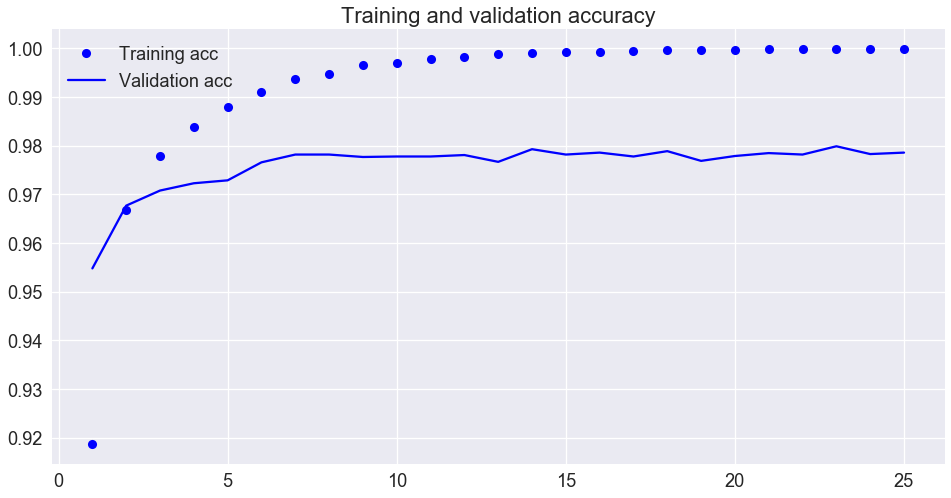

In [63]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Keras Convnet

We will now use a convolutional net, which is optimized to handle images. Note that we now don't use the flattened input now but the real image, i.e., a 28 x 28 matrix.

In [64]:
X_train = train_images
X_test = test_images
y_train =  train_labels
y_test = test_labels

In [65]:
# We take 10.000 data points from the 60.000 training set to form the validation set.
val_size = 10000

# We want to randomly select the observations for the validation set.
# Thus we first shuffle the training sample.
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

In [66]:
# Now we select the first 10.000 data points as validation sample and the 
# rest as training sample.
X_val = X_train[:val_size]
y_val = y_train[:val_size]

X_train = X_train[val_size:]
y_train = y_train[val_size:]

In [67]:
model_conv = models.Sequential()
model_conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(64, activation='relu'))
model_conv.add(layers.Dense(10, activation='softmax'))

In [68]:
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [69]:
model_conv.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The following takes ~ 25 min on my laptop, thus skipping it and just loading the results.

In [70]:
%%time

history = model_conv.fit(X_train, to_categorical(y_train),
                   epochs=25, batch_size=64,
                   validation_data=(X_val, to_categorical(y_val)))


# Save both the model and the results (accuracy, loss) when developing the model.
model_conv.save('conv_25_epoches_model.h5') 

import pickle
with open('conv_25_epoches_history.pickle', 'wb') as file:
    pickle.dump(history.history, file)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 57s 1ms/step - loss: 0.2013 - acc: 0.9369 - val_loss: 0.0622 - val_acc: 0.9805
Epoch 2/25
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0490 - val_acc: 0.9861
Epoch 3/25
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0389 - acc: 0.9882 - val_loss: 0.0402 - val_acc: 0.9870
Epoch 4/25
50000/50000 [==============================] - 58s 1ms/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0394 - val_acc: 0.9886
Epoch 5/25
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0224 - acc: 0.9931 - val_loss: 0.0338 - val_acc: 0.9899
Epoch 6/25
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0187 - acc: 0.9946 - val_loss: 0.0396 - val_acc: 0.9893
Epoch 7/25
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0154 - acc: 0.9955 - val_loss: 0.0326 - val_acc

Load the model and the results when developing the model.

In [71]:
with open('conv_25_epoches_history.pickle', 'rb') as file:
    hist_hist = pickle.load(file)

from keras.models import load_model

model_dense_val = load_model('conv_25_epoches_model.h5')

Predict the labes both for the training and the test set.

In [72]:
y_train_predict = model_dense_val.predict(X_train)
y_val_predict = model_dense_val.predict(X_val)
y_test_predict = model_dense_val.predict(X_test)

In [73]:
y_train_predict = np.argmax(y_train_predict, axis=1)
y_val_predict = np.argmax(y_val_predict, axis=1)
y_test_predict = np.argmax(y_test_predict, axis=1)

Check quality of prediction. We are now at 99% on the test sample, with some overfitting on the training set, but no overfitting on the validation set.

In [74]:
print("Accuracy on training set:  ", accuracy_score(y_train, y_train_predict), '\n'
      "Accuracy on validation set:", accuracy_score(y_val, y_val_predict), '\n'
      "Accuracy on test set:      ", accuracy_score(y_test, y_test_predict),)

Accuracy on training set:   0.99944 
Accuracy on validation set: 0.9915 
Accuracy on test set:       0.992


In [75]:
acc = hist_hist['acc']
val_acc = hist_hist['val_acc']

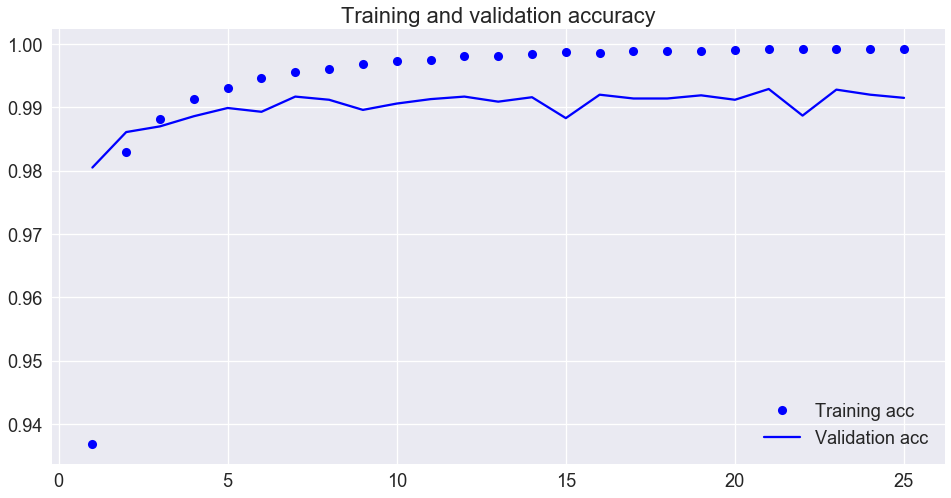

In [76]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()